In [4]:
import sys 
sys.path.append('/Users/lei/home/studyhall/smart-earth-sensing/lib') 
 
import warnings
warnings.filterwarnings('ignore')
 
import pickle 
import numpy as np
from tqdm import tqdm 
from matplotlib import pyplot as plt 
 
import torch 
from torch.utils.data import DataLoader 
from torch.nn.functional import one_hot 

from models import CNN 
from dataset import Audio_Dataset 

In [5]:
with open('../pk_files/train_val_dataset.pkl', 'rb') as f:
    data_train, data_val = pickle.load(f) 

In [ ]:
loader_train = DataLoader(data_train, batch_size=16, shuffle=True) 
loader_val = DataLoader(data_val, batch_size=16, shuffle=True) 

In [ ]:
for xs, ys in loader_train:
    print(xs.size())
    print(ys.size())
    break

torch.Size([16, 1, 26, 64])
torch.Size([16, 3])


In [ ]:
print("shape of any feature sample in data_train: {}".format(np.shape(data_train[0][0]))) 
print("shape of any label sample in data_train: {}".format(np.shape(data_train[0][1]))) 
print("shape of any feature sample in data_val: {}".format(np.shape(data_train[0][0]))) 
print("shape of any label sample in data_val: {}".format(np.shape(data_val[0][1]))) 

shape of any feature sample in data_train: torch.Size([1, 26, 64])
shape of any label sample in data_train: torch.Size([3])
shape of any feature sample in data_val: torch.Size([1, 26, 64])
shape of any label sample in data_val: torch.Size([3])


In [ ]:
print(torch.backends.mps.is_available())
print(torch.backends.mps.is_built()) 
device = torch.device("mps") 
print("The model will be running on", device, "device")

True
True
The model will be running on mps device


In [ ]:
lr = 0.005 
num_epochs = 100 
 
cnn = CNN(device) 
cnn.to(device)

CNN(
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout(p=0.5, inplace=False)
  (softmax): Softmax(dim=None)
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (linear1): Linear(in_features=32256, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=3, bias=True)
)

In [ ]:
cnn.fit(lr=lr, num_epochs=num_epochs, loader_train=loader_train, loader_val=loader_val)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [36:54<00:00, 22.15s/it]


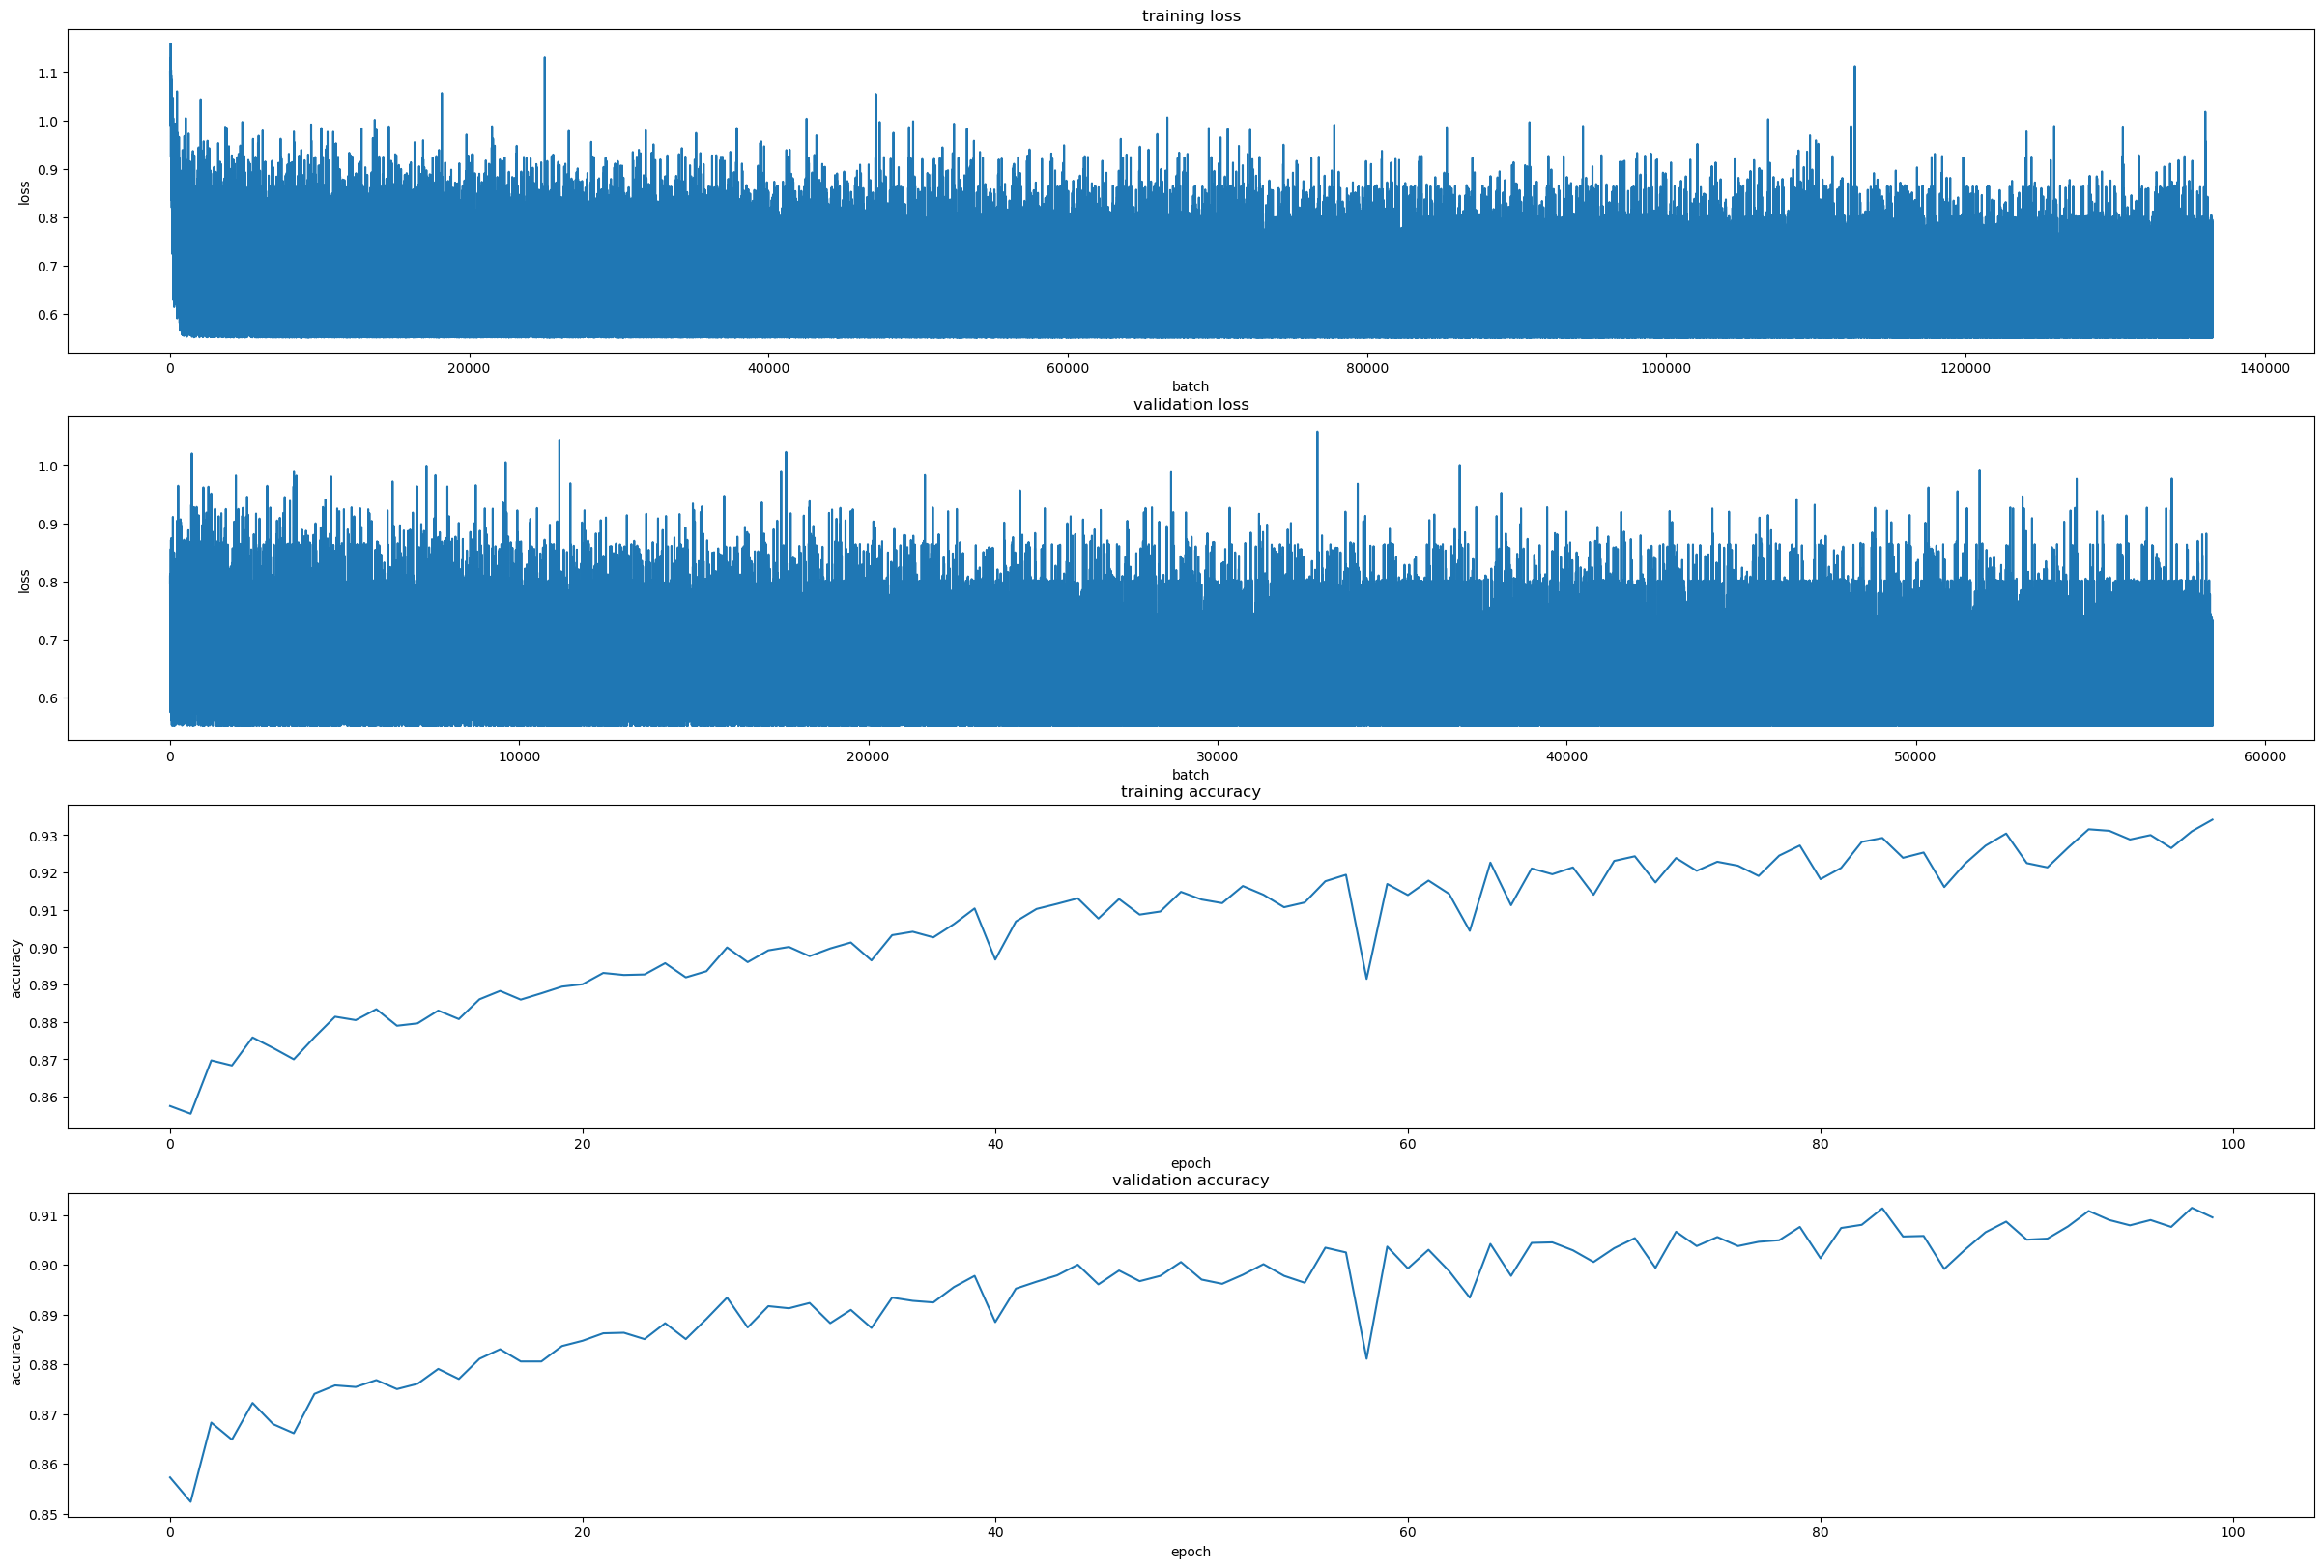

In [ ]:
plt.figure(figsize=(30, 20)) 
plt.subplot(4, 1, 1) 
plt.plot(cnn.log['training loss'])
plt.title('training loss') 
plt.xlabel('batch') 
plt.ylabel('loss') 
 
plt.subplot(4, 1, 2) 
plt.plot(cnn.log['validation loss'])
plt.title('validation loss') 
plt.xlabel('batch') 
plt.ylabel('loss') 
 
plt.subplot(4, 1, 3) 
plt.plot(cnn.log['training accuracy']) 
plt.title('training accuracy') 
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
 
plt.subplot(4, 1, 4) 
plt.plot(cnn.log['validation accuracy']) 
plt.title('validation accuracy') 
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.show() 

In [ ]:
torch.save(cnn.state_dict(), '../models/cnn_100e_0005lr_500hz.pt')